# Punto 4

In [1]:
import pandas as pd
import matplotlib as mlt
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PyQt5

In [2]:
# Para que las gráficas se impriman no en el notebook, sino en una nueva pestaña
%matplotlib qt

In [3]:
# Función para plotear complejos

def fun_ploteo_complejo(mat, indicador, escala, mapa_color = 'gray'):
    '''
    mat  es una matriz compleja a plotear
    indicador = I para intensidad, A para amplitud, P para fase
    escala = 1 para nada, 0 para logarítmica
    '''
    if(indicador =="I"):
        mat = np.abs(mat)**2
    elif(indicador == "A"):
        mat = np.abs(mat)
    elif(indicador == "P"):
        mat = np.angle(mat)

    if (escala == 1):
        plt.figure()
        plt.imshow(mat, cmap = mapa_color)
        plt.colorbar()
        plt.show()
    else:    
        plt.figure()
        plt.imshow( np.log( mat + 0.0001), cmap = mapa_color)
        plt.colorbar()
        plt.show()




## Punto 4 a

In [4]:
# Lectura de los datos

a = pd.read_csv('a.csv', header=None)              # Lecutra del .csv como un objeto np.array

# Dado que la información del csv se carga como texto y además los complejos tienen i en vez de j
# se convertirán esos textos a números complejos
a = a.applymap(lambda s: complex(s.replace('i', 'j'))).values       # Tomado de https://stackoverflow.com/questions/18280489/numpy-read-csv-with-complex-number

# dimensiones de a
np.shape(a)



(720, 720)

In [5]:
# Graficar el campo
fun_ploteo_complejo(a ,"I", 0)
#donde se observa ruido y ninguna imagen dicernible

# Graficar las fases del campo donde se encuentra la información de la imagen
fun_ploteo_complejo(a ,"P", 1)
# Adelantándonos al resultado final y observando la imagen a encontrar (spoiler alert!)

# Graficar la transformada de Fourier shifteada de a
ffts_a = np.fft.fftshift(np.fft.fftn(a))
fun_ploteo_complejo(ffts_a ,"I", 0)


In [6]:
# Crear la onda monocromática y sin fase inicial
monocromatica = np.ones(np.shape(a),  dtype=complex)

# FFT de monocromatica
ffts_monocromatica = np.fft.fftshift(np.fft.fftn(monocromatica))

# Mostrar la transformada de la onda monocromática (debe ser un punto brillante en el centro, amplificar imagen 
# si no se percibe)
fun_ploteo_complejo(ffts_monocromatica, "I", 0)

# lo que se vería en el plano focal si no existiera la transmitancia


In [7]:
# Acorde a la teoría seguiremos dos caminos:

# 1) Interferencia (no dentro del curso pero para ejemplificar), intereferiremos dos ondas, una desfasada y otra 
# no así el resultado del patrón, se verá reflejado en la intensidad

interferencia = a + monocromatica       # acer interferencia

#Aquí obtenemos el gráfico de la intensidad a partir de la interferencia de las ondas (desfasadas y pura)
fun_ploteo_complejo(interferencia ,"I", 0)

In [8]:
# 2) Tería difractiva
# entendiendo del documento word, que en el plano focal observaremos la transformada de la transmitancia 
# y en el centro (eje óptico) la transformada de la onda sin desfasar, entonces la superposición de estas
# dará como resultado la imagen deseada

# Sumas en el espacio de Fourier
fft_espectro = ffts_monocromatica + ffts_a

# Gráfica de la suma
fun_ploteo_complejo(fft_espectro, "I", 0)

#Gráfica en el espacio real
fun_ploteo_complejo(np.fft.fftn(fft_espectro),"I",0)

# Se puede observar así, que tan solo ese punto de la onda monocromática en el espacio de Fourier
# permite la obtención de la información guardada en la fase.

# Punto 4 c

In [2]:
# Lectura de los datos

war_img = cv2.imread('c.jpeg')              # Lecutra del .csv como un objeto np.array
waly_img = cv2.imread('c_clue.jpeg')
# Dado que la información del csv se carga como texto y además los complejos tienen i en vez de j
# se convertirán esos textos a números complejos


dimensiones de la imagen de guerra:  (1680, 2600, 3) 
dimensiones de waly:  (64, 64, 3)


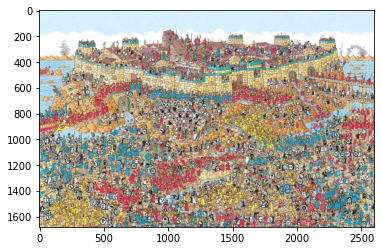

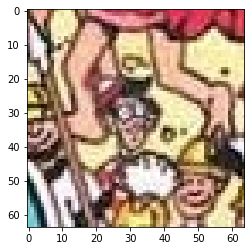

In [12]:
# Veamos las dimensiones de las imágenes
print("dimensiones de la imagen de guerra: " ,np.shape(war_img), "\ndimensiones de waly: ", np.shape(waly_img) )

# Cambiar a RGB
war_img = cv2.cvtColor(war_img, cv2.COLOR_BGR2RGB)
waly_img = cv2.cvtColor(waly_img, cv2.COLOR_BGR2RGB)

# Mostrar imágenes
plt.figure()
plt.imshow(war_img)
plt.show()

plt.figure()
plt.imshow(waly_img)
plt.show()

Como tenemos imágnes RGB, entonces por facilidad las pasaremos a escala de grices, después si se desea, 
generalizamos para imágenes RGB

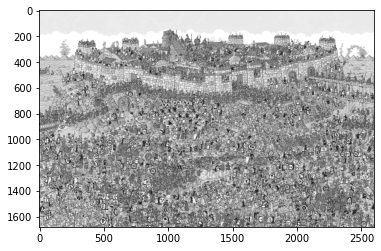

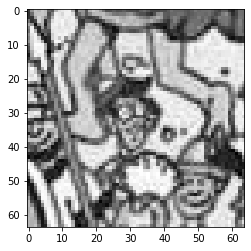

In [13]:
# Convertir imágenes RGB a escala de grises
war_gray = cv2.cvtColor(war_img, cv2.COLOR_RGB2GRAY)
waly_gray = cv2.cvtColor(waly_img, cv2.COLOR_RGB2GRAY)

# Mostrar imágenes
plt.figure()
plt.imshow(war_gray, cmap = 'gray')
plt.show()

plt.figure()
plt.imshow(waly_gray, cmap = 'gray')
plt.show()

In [12]:
# Transformada de Fourier de la imagen war
fft_war = np.fft.fftn(war_gray)

# Shifteando
ffts_war = np.fft.fftshift(fft_war)




# Pad

(1680, 2600)


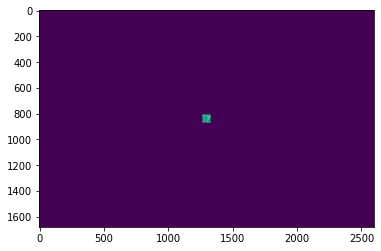

In [14]:
# Extraer la dimension para "padear"
dimension_pad = (np.array(np.shape(war_gray) ) - np.array(np.shape(waly_gray) ) )/2

# Padear Waly
waly_paded = np.pad(waly_gray, ( (int(dimension_pad[0]), int(dimension_pad[0]) ), (int(dimension_pad[1]), int(dimension_pad[1])) ), mode = 'constant', constant_values = (0,0) )

plt.imshow(waly_paded)

print(np.shape(waly_paded) )


In [15]:
dimension_pad

array([ 808., 1268.])

In [14]:
# Fourier de Waly "padeado" y conjugarlo
fft_p_waly = np.fft.fftn(waly_paded)
ffts_p_waly = np.fft.fftshift(fft_p_waly)       # Shift
c_ffts_p_waly = np.conj(ffts_p_waly)            # Conjugando


correlacion = ffts_war * c_ffts_p_waly             # multiplicando  las transformadas


#Graficando

# ffts de la imagen original (Transformada de Fourier del plano incidente, observado en el plano focal)
fun_ploteo_complejo(ffts_war, "I" , 0)

# fft conjugado padeado de waly (la transmitancia/filtro que iría en el plano focal de la primera lente)
fun_ploteo_complejo(c_ffts_p_waly, "I", 0)

# la multiplicación de las transformadas 
fun_ploteo_complejo(correlacion, "I", 0)

# Regresando a al dominio espacial y graficando (lo que se observaría en el plano imagen que)
fun_ploteo_complejo(np.fft.fftn(correlacion), "I", 1)